Code is available here https://github.com/qetsc/petSCF
# Installation
* `git clone https://github.com/qetsc/petSCF`
* `pip3 install -r requirements.txt` 

In [1]:
import sys
pscfpath='/Users/keceli/soft/matrix/QETSc/petSCF/'

sys.path.insert(1,pscfpath)
import petsctools as pt
import slepctools as st
import numpy as np
import matplotlib.pylab as plt

sklearn.cluster not found.
-bintype 3, can not be used


In [2]:
import scipy.io
mat = scipy.io.loadmat('/Users/keceli/soft/matrix/QETSc/qetsc/matdir/Large_Connection_Matrix_100K.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Aug  8 16:15:20 2022',
 '__version__': '1.0',
 '__globals__': [],
 'ConnectEvenToOdd_out': <57186x56715 sparse matrix of type '<class 'numpy.float64'>'
 	with 226835 stored elements in Compressed Sparse Column format>}

In [4]:
type(mat['ConnectEvenToOdd_out'])

scipy.sparse._csc.csc_matrix

In [5]:
G = mat['ConnectEvenToOdd_out']

In [6]:
G.toarray()

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.]])

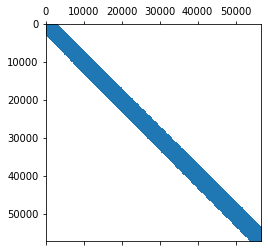

In [7]:
plt.spy(G)

In [8]:
H = scipy.sparse.bmat([[None,G],[G.transpose(),None]])

In [9]:
type(H)

scipy.sparse._coo.coo_matrix

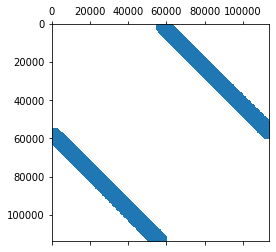

In [10]:
plt.spy(H)

In [11]:
%%time
scipy.sparse.linalg.eigsh(H,k=1,return_eigenvectors=False)

CPU times: user 1min 15s, sys: 3.09 s, total: 1min 18s
Wall time: 35.9 s


array([4.2214871])

In [12]:
%%time
# Much faster when a shift near the largest eigenvalue is used
scipy.sparse.linalg.eigsh(H,k=15,return_eigenvectors=False,sigma=4.23)

CPU times: user 4.6 s, sys: 582 ms, total: 5.19 s
Wall time: 3.19 s


array([4.21922645, 4.21925677, 4.21944182, 4.219787  , 4.21980109,
       4.22001552, 4.22012188, 4.22031584, 4.2203754 , 4.22064028,
       4.22078797, 4.22084616, 4.22117228, 4.22125213, 4.2214871 ])

In [16]:
%%time
# Slower with more
scipy.sparse.linalg.eigsh(H,k=150,return_eigenvectors=False,sigma=-4.23)

CPU times: user 56.6 s, sys: 1.37 s, total: 58 s
Wall time: 15.9 s


array([-4.2214871 , -4.22125213, -4.22117228, -4.22084616, -4.22078797,
       -4.22064028, -4.2203754 , -4.22031584, -4.22012188, -4.22001552,
       -4.21980109, -4.219787  , -4.21944182, -4.21925677, -4.21922645,
       -4.21907584, -4.21899719, -4.2185958 , -4.21844715, -4.21834962,
       -4.21832422, -4.21829864, -4.21814894, -4.21779913, -4.21757486,
       -4.21753636, -4.21747788, -4.21732035, -4.21725089, -4.21710081,
       -4.2166952 , -4.21658444, -4.21651049, -4.21643674, -4.21615187,
       -4.21607009, -4.21592591, -4.21580393, -4.21563276, -4.21552008,
       -4.21541672, -4.21533634, -4.21506774, -4.21483922, -4.21467983,
       -4.21462295, -4.21452882, -4.21440267, -4.21433573, -4.21421166,
       -4.21409249, -4.21373725, -4.213606  , -4.21358498, -4.21339584,
       -4.21334289, -4.21302904, -4.2129081 , -4.2128323 , -4.21276516,
       -4.21259193, -4.21250232, -4.21236487, -4.21221192, -4.21214115,
       -4.21193565, -4.21181524, -4.21172895, -4.21140619, -4.21

In [17]:
%%time
# We can also calculate interior eigenvalues/eigenvectors close to the shift
scipy.sparse.linalg.eigsh(H,k=15,return_eigenvectors=True,sigma=-2.23)

CPU times: user 4.83 s, sys: 1.4 s, total: 6.23 s
Wall time: 3.45 s


(array([-2.2304935 , -2.23045697, -2.23040497, -2.23029829, -2.23025433,
        -2.23015223, -2.23004424, -2.2299841 , -2.22994993, -2.22990611,
        -2.22985635, -2.22967359, -2.22953293, -2.22945588, -2.2293969 ]),
 array([[ 2.16816228e-03, -2.42940320e-03,  9.54042954e-04, ...,
          1.09166273e-04,  2.19425261e-03,  3.73140334e-03],
        [ 2.10337152e-03,  1.24622885e-03,  1.00013150e-03, ...,
          1.11697265e-03,  3.69936356e-03,  5.21845187e-03],
        [ 1.59694031e-03, -1.42664926e-03,  1.21270056e-03, ...,
         -9.77007253e-04,  5.05807706e-05, -6.75316524e-04],
        ...,
        [ 4.92021315e-04, -3.03841037e-03, -2.21574843e-03, ...,
          5.81825330e-04,  3.24719766e-03, -5.04985332e-03],
        [ 2.13963091e-03, -3.56046526e-03, -2.29681800e-03, ...,
          1.27163200e-03, -8.90077862e-04, -2.80014153e-04],
        [ 2.78464509e-03, -2.89821060e-03, -1.39720815e-03, ...,
          1.63482910e-03, -5.24600752e-03,  4.44711225e-03]]))

# Using PETSc and SLEPc

In [13]:
# Convert scipy matrix to petsc matrix

H.setdiag(0.) # First explicitly set zeros for the diagonal. Otherwise SLEPc fails with an error: MUMPS in numerical factorization phase: INFOG(1)=-9
Amat = pt.convertCSR2AIJ(H)

('size', (113901, 113901))


In [14]:
%%time
# We can calculate the largest eigenvalue and eigenvector with SLEPc, too. Compare with scipy above.
st.get_eigenpairs(Amat,npairs=1)

Matrix size: 113901
CPU times: user 24.6 s, sys: 1.39 s, total: 26 s
Wall time: 11.4 s


(array([4.2214871]),
 array([[-4.41282098e-03],
        [-4.46276358e-03],
        [-4.41289120e-03],
        ...,
        [-1.23034218e-05],
        [-1.60044735e-05],
        [-1.11539780e-05]]))

In [15]:
# Using SIPs with SLEPc4py
import sys, slepc4py
from petsc4py import PETSc
from slepc4py import SLEPc

slepc4py.init(sys.argv)
eps = SLEPc.EPS(); eps.create()
eps.setOperators(Amat)
eps.setFromOptions()
eps.setProblemType(SLEPc.EPS.ProblemType.GHEP)
eps.setInterval(2.3,4.3)
eps.setWhichEigenpairs(SLEPc.EPS.Which.ALL)
eps.setType(SLEPc.EPS.Type.KRYLOVSCHUR)
st = eps.getST()
st.setType(SLEPc.ST.Type.SINVERT)
ksp = eps.getKrylovSchurKSP()
ksp.setType('preonly')
pc = ksp.getPC()
pc.setType('cholesky')

In [16]:
%%time 
# Compute number of eigenvalues in a given interval
# This operation requires two Cholesky factorizations at the boundaries.
eps.setInterval(2.3,4.3)
eps.setUp()
interval, nevals = eps.getKrylovSchurInertias()
print(f'Number of eigenvalues smaller than {interval[0]}: {nevals[0]} ')
print(f'Number of eigenvalues smaller than {interval[1]}: {nevals[1]} ')
print(f'Number of eigenvalues in the interval [{interval[0]}, {interval[1]}]: {nevals[1]-nevals[0]} ')

Number of eigenvalues smaller than 2.3: 97343 
Number of eigenvalues smaller than 4.3: 113901 
Number of eigenvalues in the interval [2.3, 4.3]: 16558 
CPU times: user 1 s, sys: 15.4 ms, total: 1.02 s
Wall time: 1.02 s


In [17]:
eps.setInterval(-0.01,0.01)
eps.setUp()
interval, nevals = eps.getKrylovSchurInertias()
print(f'Number of eigenvalues smaller than {interval[0]}: {nevals[0]} ')
print(f'Number of eigenvalues smaller than {interval[1]}: {nevals[1]} ')
print(f'Number of eigenvalues in the interval [{interval[0]}, {interval[1]}]: {nevals[1]-nevals[0]} ')

Number of eigenvalues smaller than -0.01: 51966 
Number of eigenvalues smaller than 0.01: 61935 
Number of eigenvalues in the interval [-0.01, 0.01]: 9969 


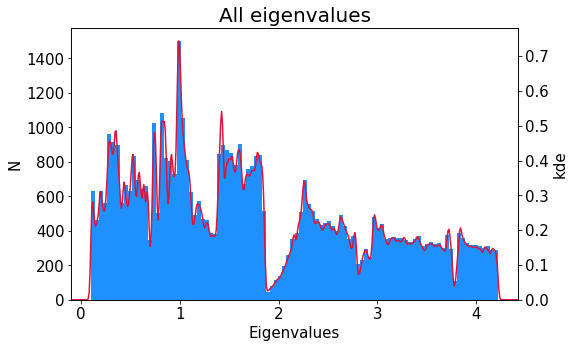

In [18]:
# I calculated the eigenvalues within [0.1, 4.25] in parallel using 36 slices.
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

Eig_nn = np.loadtxt('/Users/keceli/soft/matrix/QETSc/notebook/eig0-4.m')

# From stackoverflow https://stackoverflow.com/questions/60091790/how-to-plot-the-density-of-states-using-histogram-with-a-curve-that-follows-the
bins = 100
plt.rcParams.update({'font.size': 15})
fig, ax1 = plt.subplots(figsize=[8,5])
bin_values, bin_lims, _patches  = plt.hist(Eig_nn, bins, color='dodgerblue')

x = np.linspace(bin_lims[0]-0.2, bin_lims[-1]+0.2, 500) # create an x-axis
kde = gaussian_kde(Eig_nn, 0.01)
ax2 = ax1.twinx()  
ax2.plot(x, kde(x), color='crimson')

ax1.set_xlim(x[0], x[-1])  # set strict limits
ax1.set_xlabel('Eigenvalues')
ax1.set_ylabel('N')
ax2.set_ylabel('kde')
ax2.set_ylim(ymin=0) # put the zero of the secondary y-axis at the bottom
plt.title('All eigenvalues', fontsize=20)

#plt.show()
plt.savefig('spectrum.pdf')